In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [4]:
f = open ('CO_map_z1.500.bin', 'rb')
N = np.fromfile (f, count=3, dtype=np.uint64)
N1,N2,N3 = N
grid_spacing = np.fromfile (f, count=1, dtype=np.float32)
data = np.fromfile (f, count=N1*N2*N3, dtype=np.float32)
f.close ()
data = data.reshape ((N1,N2,N3), order='C')

In [5]:
print(np.min(data), np.max(data), np.mean(data))

0.0 5370.32 0.50898254


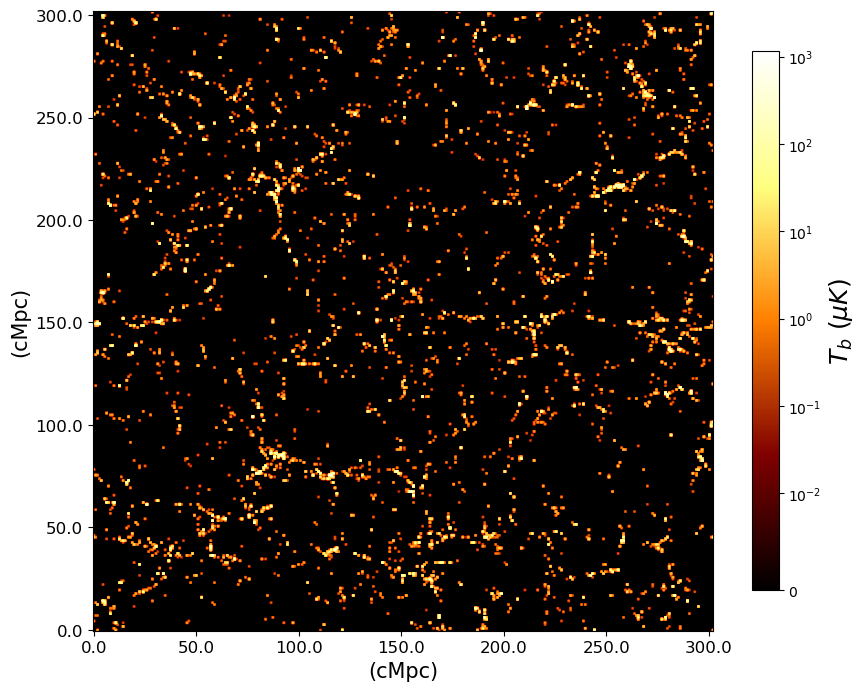

In [6]:
num = np.random.randint(N[2])

fig, ax = plt.subplots(figsize = (10,10))

ticklabels = np.arange(0,N[0],50)
ticks = ticklabels/grid_spacing

co = ax.imshow(data[:,:,num],
               cmap='afmhot',
               norm=colors.SymLogNorm(linthresh = 1e-2)
               )
cb = fig.colorbar(co, ax = ax,
                  shrink = 0.7
                  )
cb.set_label(label = r'$T_b$ ($\mu K$)', fontsize = 18)

ax.invert_yaxis()
ax.set_xlabel('(cMpc)', fontsize = 15)
ax.set_ylabel('(cMpc)', fontsize = 15)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, fontsize = 12)
ax.set_yticklabels(ticklabels, fontsize = 12)

plt.show()